# Simulated data

* bidimensional
* 2 classes


In [3]:
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt

np.set_printoptions(precision=4)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

In [4]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

def plot_gmm(gmm, X, label=[], ax=None):
    ax = ax or plt.gca()
    
    if len(label) > 0:
        labels = label
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    ws = [value for g in gmm for (param, value) in g.items() if param == 'w']
    w_factor = 0.2 /np.max(ws)
    for param in gmm:
        pos = param['mu']
        covar = param['Covar']
        w = param['w']

        draw_ellipse(pos, covar, alpha=w * w_factor)

In [7]:
### Setup
# set random seed
rand.seed(2018)

# 2 clusters
# not that both covariance matrices are diagonal
mu1 = [0.0, 3.5]
Sigma1 = [ [2.0, 1.1], [1.1, 1.0] ]

mu2 = [5.0, 0.0]
Sigma2 = [ [4.0, 0.50], [0.50, 1.0] ]

# generate samples
N1 = 75
N2 = 150
x1, y1 = np.random.multivariate_normal(mu1, Sigma1, N1).T
x2, y2 = np.random.multivariate_normal(mu2, Sigma2, N2).T

xs = np.concatenate((x1, x2))
ys = np.concatenate((y1, y2))
labels = ([1] * N1) + ([2] * N2)

data = {'x': xs, 'y': ys, 'label': labels}
df = pd.DataFrame(data=data)

# inspect the data
df.sample(5).head(5)

,label,x,y
176,2,6.556424,-1.179438
25,1,-0.541909,2.799017
37,1,-1.397627,3.403194
83,2,2.265002,0.276942
40,1,1.463197,4.280580


Text(4.2,3.2,'new point')

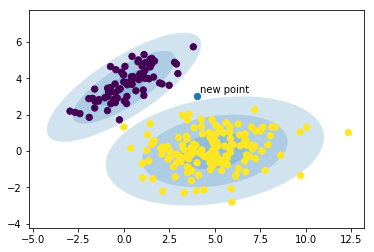

In [6]:
labels = df.label
X = df[['x','y']].values

initial_guess = [{ 'mu': np.asarray(mu1),
          'Covar': np.asarray(Sigma1),
          'w': 0.5 },  
          {'mu': np.asarray(mu2),
          'Covar': np.asarray(Sigma2),
          'w': 0.5}]

#plot_gmm(initial_guess, X,label=labels)

ax = plt.gca()
plot_gmm(initial_guess, X, label=labels, ax=ax)

ax.scatter(4, 3, s=40, cmap='viridis', zorder=2)
ax.text(4.2, 3.2, 'new point')